In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
dataset_path = '/content/drive/MyDrive/brain_tumor _dataset'
for file in os.listdir(dataset_path):
    print(file) # Indent this line

Test_df
Train_df


In [ ]:
from google.colab.patches import cv2_imshow
Test_df= '/content/drive/MyDrive/brain_tumor _dataset/Test_df/meningioma'
Train_df='/content/drive/MyDrive/brain_tumor _dataset/Train_df/meningioma'
print(os.listdir(Test_df))
print(os.listdir(Train_df))

['Te-me_0035.jpg', 'Te-me_0034.jpg', 'Te-me_0038.jpg', 'Te-me_0010.jpg', 'Te-meTr_0004.jpg', 'Te-meTr_0006.jpg', 'Te-meTr_0008.jpg', 'Te-me_0032.jpg', 'Te-me_0033.jpg', 'Te-me_0029.jpg', 'Te-me_0024.jpg', 'Te-me_0015.jpg', 'Te-me_0039.jpg', 'Te-me_0025.jpg', 'Te-meTr_0005.jpg', 'Te-me_0011.jpg', 'Te-me_0020.jpg', 'Te-meTr_0009.jpg', 'Te-me_0022.jpg', 'Te-me_0026.jpg', 'Te-meTr_0007.jpg', 'Te-me_0036.jpg', 'Te-me_0027.jpg', 'Te-meTr_0002.jpg', 'Te-meTr_0003.jpg', 'Te-me_0021.jpg', 'Te-meTr_0000.jpg', 'Te-me_0018.jpg', 'Te-me_0014.jpg', 'Te-me_0019.jpg', 'Te-me_0030.jpg', 'Te-me_0031.jpg', 'Te-meTr_0001.jpg', 'Te-me_0037.jpg', 'Te-me_0028.jpg', 'Te-me_0017.jpg', 'Te-me_0023.jpg', 'Te-me_0012.jpg', 'Te-me_0016.jpg', 'Te-me_0013.jpg', 'Te-me_0049.jpg', 'Te-me_0081.jpg', 'Te-me_0061.jpg', 'Te-me_0085.jpg', 'Te-me_0082.jpg', 'Te-me_0043.jpg', 'Te-me_0046.jpg', 'Te-me_0080.jpg', 'Te-me_0056.jpg', 'Te-me_0040.jpg', 'Te-me_0057.jpg', 'Te-me_0064.jpg', 'Te-me_0072.jpg', 'Te-me_0066.jpg', 'Te-me_

In [ ]:
# Preprocessing and Data Loading

# Define lists to store images and labels
images = []
labels = []

# Assuming 'meningioma' implies a positive case (label 1) and other directories
# (if they exist within Train_df/Test_df) would imply negative cases (label 0)
# Modify this logic based on your actual dataset structure and labels.
image_dirs = {
    '/content/drive/MyDrive/brain_tumor _dataset/Train_df/meningioma': 1,
    '/content/drive/MyDrive/brain_tumor _dataset/Test_df/meningioma': 1,
    # Add other directories for negative cases if they exist, e.g.:
    # '/content/drive/MyDrive/brain_tumor _dataset/Train_df/no_tumor': 0,
    # '/content/drive/MyDrive/brain_tumor _dataset/Test_df/no_tumor': 0
}

for directory, label in image_dirs.items():
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        # Check if the file is an image (you might want more robust checking)
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if img is not None: # Check if image was loaded successfully
                img = cv2.resize(img, (128, 128))
                img = img / 255.0
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Could not load image: {image_path}")


# Convert lists to NumPy arrays
X = np.array(images)
y = np.array(labels)

# Reshape X to include the channel dimension (for grayscale images)
X = X.reshape(-1, 128, 128, 1)

# Convert labels to one-hot encoding for categorical crossentropy
y = to_categorical(y, num_classes=2) # Assuming 2 classes: meningioma and not meningioma

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now X_train, y_train, X_test, and y_test are defined and can be used for training

# From ipython-input-46-19abd13168d1:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # For binary classification
])

# From ipython-input-47-19abd13168d1:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9557 - loss: 0.0687 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 75s 851ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 858ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 34s 812ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 810ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 856ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 809ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 822ms/

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,002 (28.20 MB)

 Trainable params: 7,392,002 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


In [53]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 837ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 822ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 884ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 833ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 850ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [60]:
from google.colab.patches import cv2_imshow
Test_df= '/content/drive/MyDrive/brain_tumor _dataset/Test_df/notumor'
Train_df='/content/drive/MyDrive/brain_tumor _dataset/Train_df/notumor'
print(os.listdir(Test_df))
print(os.listdir(Train_df))

['Te-no_0041.jpg', 'Te-no_0014.jpg', 'Te-noTr_0008.jpg', 'Te-no_0036.jpg', 'Te-no_0032.jpg', 'Te-no_0040.jpg', 'Te-noTr_0007.jpg', 'Te-no_0012.jpg', 'Te-no_0039.jpg', 'Te-no_0018.jpg', 'Te-noTr_0005.jpg', 'Te-no_0023.jpg', 'Te-no_0042.jpg', 'Te-no_0030.jpg', 'Te-no_0015.jpg', 'Te-no_0011.jpg', 'Te-no_0029.jpg', 'Te-noTr_0000.jpg', 'Te-no_0043.jpg', 'Te-no_0026.jpg', 'Te-noTr_0002.jpg', 'Te-no_0035.jpg', 'Te-no_0027.jpg', 'Te-no_0017.jpg', 'Te-noTr_0006.jpg', 'Te-no_0034.jpg', 'Te-noTr_0009.jpg', 'Te-no_0010.jpg', 'Te-no_0016.jpg', 'Te-no_0033.jpg', 'Te-no_0021.jpg', 'Te-no_0020.jpg', 'Te-no_0028.jpg', 'Te-noTr_0004.jpg', 'Te-no_0019.jpg', 'Te-noTr_0003.jpg', 'Te-noTr_0001.jpg', 'Te-no_0022.jpg', 'Te-no_0025.jpg', 'Te-no_0037.jpg', 'Te-no_0024.jpg', 'Te-no_0038.jpg', 'Te-no_0031.jpg', 'Te-no_0013.jpg', 'Te-no_0076.jpg', 'Te-no_0097.jpg', 'Te-no_0055.jpg', 'Te-no_0092.jpg', 'Te-no_0051.jpg', 'Te-no_0073.jpg', 'Te-no_0090.jpg', 'Te-no_0044.jpg', 'Te-no_0060.jpg', 'Te-no_0075.jpg', 'Te-no_

In [63]:
# Preprocessing and Data Loading

# Define lists to store images and labels
images = []
labels = []

# Assuming 'meningioma' implies a positive case (label 1) and other directories
# (if they exist within Train_df/Test_df) would imply negative cases (label 0)
# Modify this logic based on your actual dataset structure and labels.
image_dirs = {
    '/content/drive/MyDrive/brain_tumor _dataset/Train_df/notumor': 1,
    '/content/drive/MyDrive/brain_tumor _dataset/Test_df/notumor': 1,
    # Add other directories for negative cases if they exist, e.g.:
    # '/content/drive/MyDrive/brain_tumor _dataset/Train_df/no_tumor': 0,
    # '/content/drive/MyDrive/brain_tumor _dataset/Test_df/no_tumor': 0
}

for directory, label in image_dirs.items():
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        # Check if the file is an image (you might want more robust checking)
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if img is not None: # Check if image was loaded successfully
                img = cv2.resize(img, (128, 128))
                img = img / 255.0
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Could not load image: {image_path}")


# Convert lists to NumPy arrays
X = np.array(images)
y = np.array(labels)

# Reshape X to include the channel dimension (for grayscale images)
X = X.reshape(-1, 128, 128, 1)

# Convert labels to one-hot encoding for categorical crossentropy
y = to_categorical(y, num_classes=2) # Assuming 2 classes: meningioma and not meningioma

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now X_train, y_train, X_test, and y_test are defined and can be used for training

# From ipython-input-46-19abd13168d1:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # For binary classification
])

# From ipython-input-47-19abd13168d1:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 862ms/step - accuracy: 0.9529 - loss: 0.0606 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 858ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 892ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 995ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 858ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 857ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 861ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 871

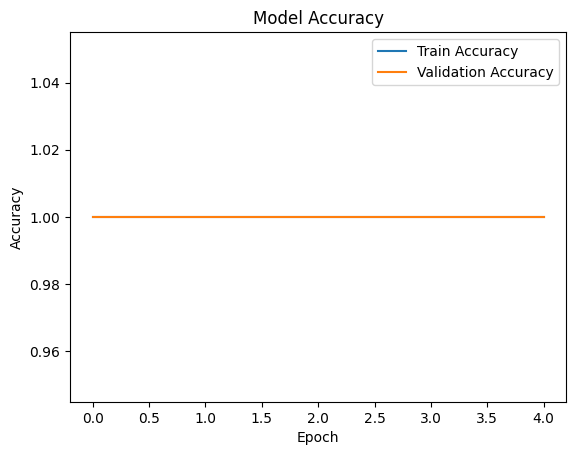

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [55]:
# Replace with your image path
test_image_path = '/content/drive/MyDrive/brain_tumor _dataset/Test_df/meningioma/Te-me_0010.jpg'
img = preprocess_image(test_image_path)

# Predict
prediction = model.predict(img)
class_index = np.argmax(prediction)
confidence = np.max(prediction)

# Get label
label = "Tumor" if class_index == 1 else "No Tumor"
print(f"Prediction: {label} ({confidence * 100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Prediction: Tumor (100.00%)


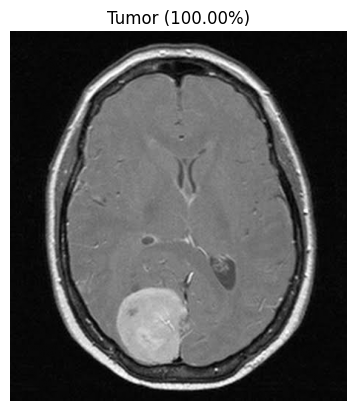

In [57]:
import matplotlib.pyplot as plt

original = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(original, cmap='gray')
plt.title(f"{label} ({confidence * 100:.2f}%)")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction:  No Tumor (100.00%)


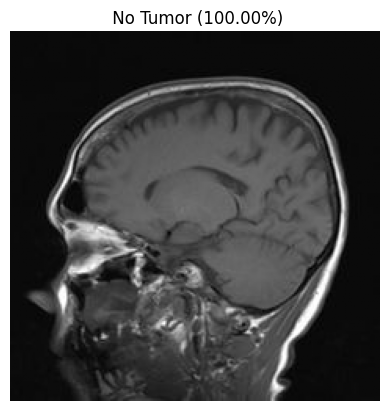

In [69]:
# Replace with your image path
test_image_path = '/content/drive/MyDrive/brain_tumor _dataset/Test_df/notumor/Te-no_0015.jpg'
img = preprocess_image(test_image_path)

# Predict
prediction = model.predict(img)
class_index = np.argmax(prediction)
confidence = np.max(prediction)

# Get label
label = " No Tumor" if class_index == 1 else " Tumor"
print(f"Prediction: {label} ({confidence * 100:.2f}%)")
image=cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.title(f"{label} ({confidence * 100:.2f}%)")
plt.axis('off')
plt.show()